# Time Series Data Exploration & Visualization Assignment

In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

### Read the sales.csv data set into a Pandas dataframe.

In [8]:
sales = pd.read_csv("../data/sales.csv", sep=";")
sales.head()

<IPython.core.display.Javascript object>

### Convert the SalesDate field to a datetime data type.

In [11]:
sales["SalesDate"] = pd.to_datetime(sales["SalesDate"])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


<IPython.core.display.Javascript object>

### Create a line chart showing the number of total units sold per day in February.

In [74]:
sales["month"] = sales["SalesDate"].dt.month
sales["day_of_month"] = sales["SalesDate"].dt.day
sales["hour"] = sales["SalesDate"].dt.hour
sales["weekday"] = sales["SalesDate"].dt.weekday
sales["year"] = sales["SalesDate"].dt.year
sales["date"] = sales["SalesDate"].dt.date

sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,month,day_of_month,hour,weekday,year,date
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,2.0,5.0,7.0,0.0,2018.0,2018-02-05
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,2.0,2.0,16.0,4.0,2018.0,2018-02-02
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,5.0,3.0,19.0,3.0,2018.0,2018-05-03
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,4.0,7.0,14.0,5.0,2018.0,2018-04-07
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,2.0,12.0,15.0,0.0,2018.0,2018-02-12


<IPython.core.display.Javascript object>

In [70]:
sales["year"].value_counts()

2018.0    6690599
Name: year, dtype: int64

<IPython.core.display.Javascript object>

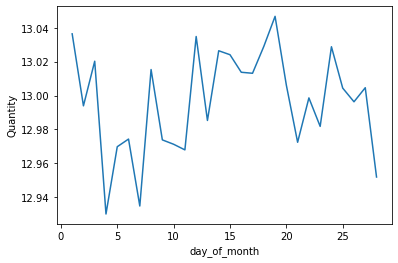

<IPython.core.display.Javascript object>

In [71]:
feb_df = sales.loc[sales["month"] == 2]
sns.lineplot(x="day_of_month", y="Quantity", data=feb_df, ci=None)

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

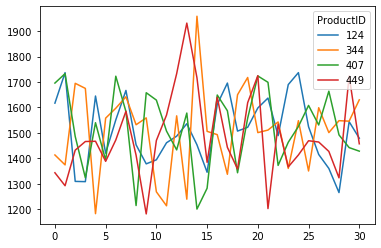

<IPython.core.display.Javascript object>

In [77]:
march_df = sales.loc[sales["month"] == 3]
prod_ids = [124, 344, 407, 449]
march_df = march_df.loc[march_df["ProductID"].isin(prod_ids)]

daily_df = march_df.pivot_table(
    index="date", columns="ProductID", values="Quantity", aggfunc="sum"
).reset_index()
daily_df.plot()

# sns.lineplot(
#     x="day_of_month",
#     y="Quantity",
#     hue="ProductID",
#     ci=None,
#     palette="colorblind",
#     data=march_df,
# )

### Create a bar chart that shows units sold by each hour of the day.

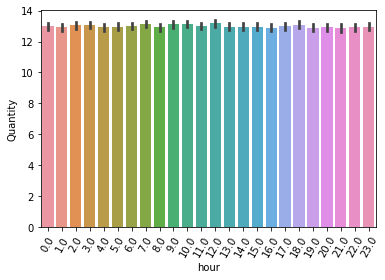

<IPython.core.display.Javascript object>

In [41]:
sns.barplot(x="hour", y="Quantity", hue=None, data=sales.sample(100000))
plt.xticks(rotation=60)
plt.show()

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

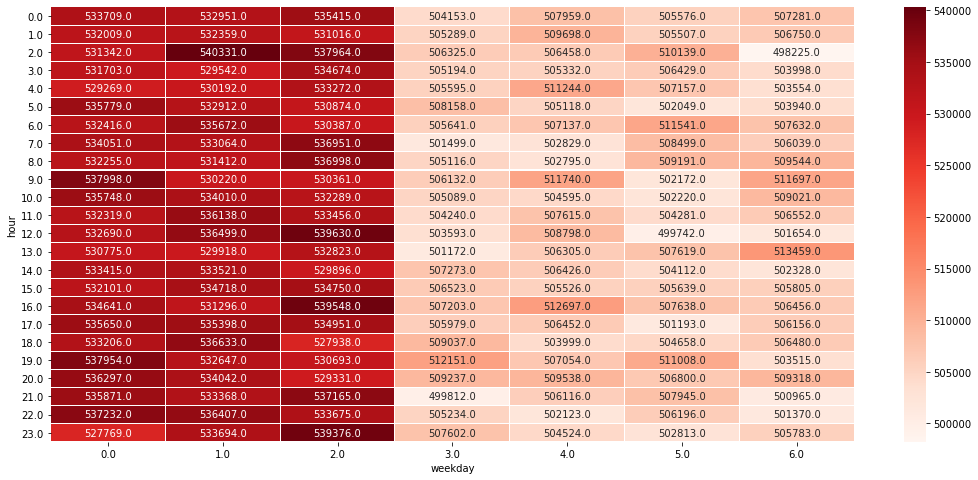

<IPython.core.display.Javascript object>

In [67]:
agg_df = sales.groupby(["hour", "weekday"]).sum()["Quantity"].reset_index()
hour_weekday = agg_df.pivot_table(
    index="hour", columns="weekday", values="Quantity", aggfunc="sum"
)
plt.figure(figsize=(18, 8))
sns.heatmap(hour_weekday, annot=True, fmt=".1f", cmap="Reds", linewidths=0.01)
plt.show()

In [68]:
sales["month"].value_counts()

3.0    1609190
1.0    1607050
4.0    1556091
2.0    1451366
5.0     466902
Name: month, dtype: int64

<IPython.core.display.Javascript object>

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [78]:
# rand_ids =
prod_ids = sales["ProductID"].unique()
prod_20 = np.random.choice(prod_ids, size=20, replace=False)

product = sales.loc[sales["ProductID"].isin(prod_20)]

<IPython.core.display.Javascript object>

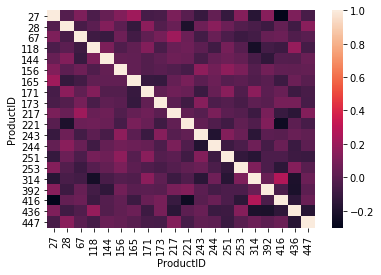

<IPython.core.display.Javascript object>

In [82]:
prod_corr = product_daily = product.pivot_table(
    index="date", columns="ProductID", values="Quantity", aggfunc="sum"
).corr()
sns.heatmap(prod_corr)

### Create a histogram showing the distribution of daily units sold.

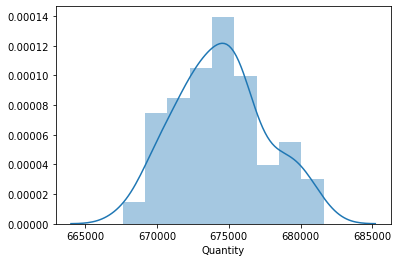

<IPython.core.display.Javascript object>

In [91]:
daily_units = sales.groupby("date").agg({"Quantity": "sum"}).reset_index()
sns.distplot(daily_units["Quantity"])

### Create a violin plot showing the distribution of daily units sold by month.